In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sales = pd.read_csv("https://raw.githubusercontent.com/GerhardTrippen/DataSets/master/sample-salesv2.csv", parse_dates=['date'])
sales.head()
sales.dtypes
sales.describe()
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [9]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


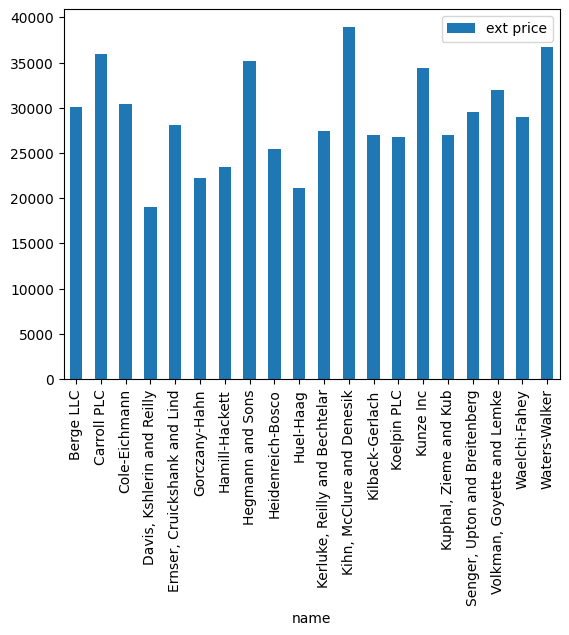

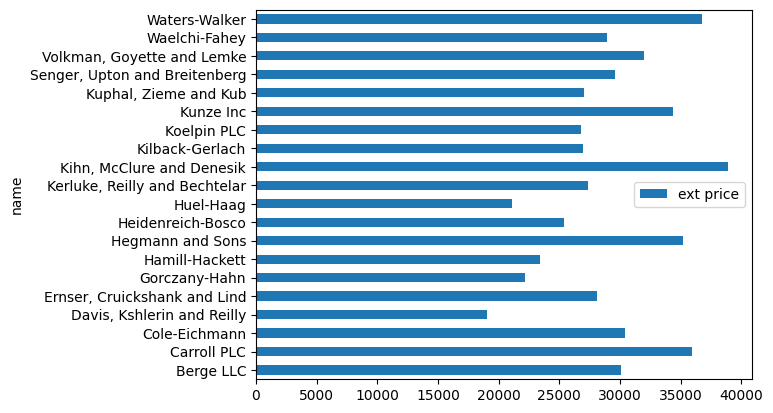

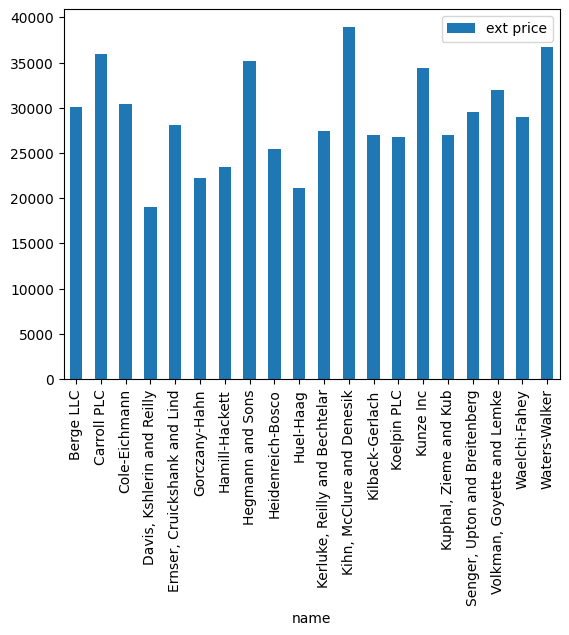

In [8]:
customers = sales[['name','ext price','date']]
customers.head()
customer_group = customers.groupby('name')
customer_group.size()
sales_totals = customer_group.sum()
sales_totals.sort_values('ext price').head()
my_plot = sales_totals.plot(kind='bar')
my_plot = sales_totals.plot(kind='barh')
# identical
my_plot = sales_totals.plot.bar()

Text(0, 0.5, 'Sales ($)')

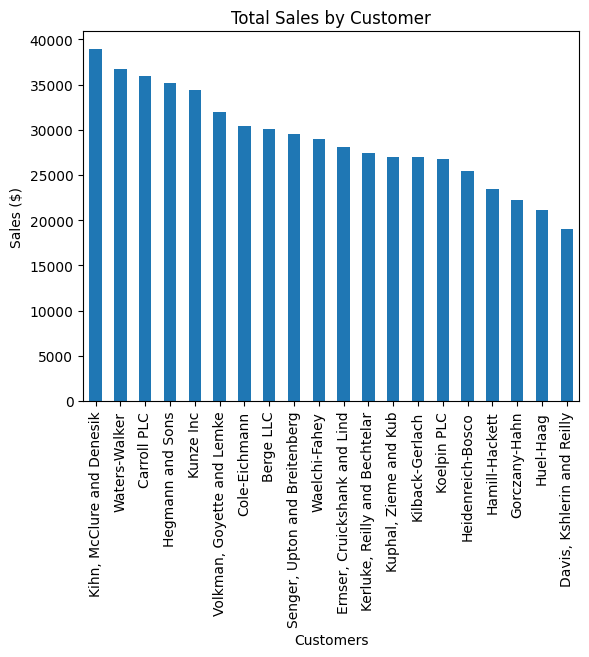

In [10]:
my_plot = sales_totals.sort_values('ext price', 
ascending=False).plot(kind='bar', legend=None, 
title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                                     ext price
name                       category           
Berge LLC                  Belt        6033.53
                           Shirt       9670.24
                           Shoes      14361.10
Carroll PLC                Belt        9359.26
                           Shirt      13717.61
                           Shoes      12857.44
Cole-Eichmann              Belt        8112.70
                           Shirt      14528.01
                           Shoes       7794.71
Davis, Kshlerin and Reilly Belt        1604.1

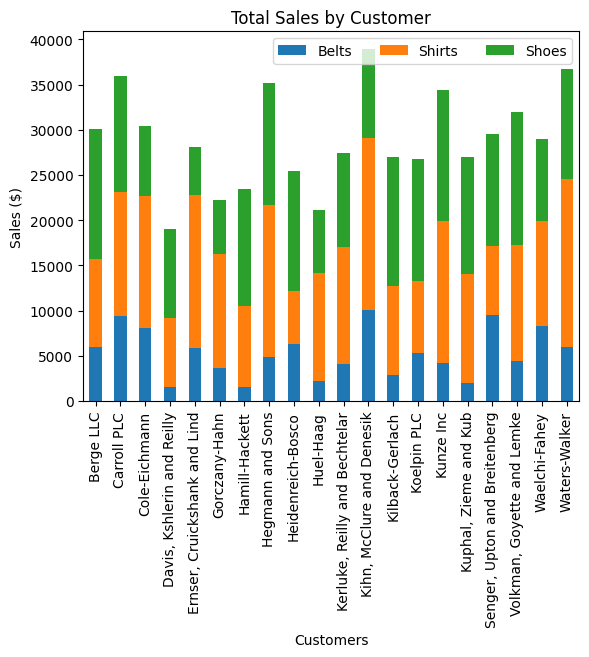

In [12]:
customers = sales[['name', 'category', 'ext price', 'date']]
print(customers.head())
category_group = customers.groupby(['name','category']).sum()
print(category_group.head(10))
category_group = category_group.unstack() # unstack to belt shoes..
print(category_group.head(10))
my_plot = category_group.plot(kind='bar', stacked=True, 
title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
my_plot.legend(["Belts","Shirts","Shoes"], loc='best', 
ncol=3)